<h1 style="color: #2e6c80;">1. Importando Bibliotecas e configurações</h1>

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from itertools import product # Produto cartesiano
import seaborn as sns
from IPython.display import HTML
plt.rcParams['figure.dpi'] = 300  
plt.rcParams['animation.embed_limit'] = 30

<h1 style="color: #2e6c80;">1. Potencial de Lennard-Jones</h1>
$$U_{LJ}(\vec r) = 4 \epsilon \left[ \left( \frac{\sigma}{r}\right)^{12} - \left( \frac{\sigma}{r}\right)^{6} \right]$$

Onde:
* $r = |\vec r|$ é a distância entre duas partículas
* Assumiremos: $\epsilon \to 1$, $\sigma \to 1$
* $(\frac{\sigma}{r})^{12}$, representa as interações repulsivas de curta distância
* $(\frac{\sigma}{r})^6$, representa as interações atrativas de longa distância

In [8]:

def calc_potencial_lj(r, epsilon = 1, sigma = 1):
    """
    Calcula o potencial de Lennard-Jones.
    """
    # lista com os valores do potencial de Lennard-Jones para cada distância entre duas partículas
    ulj = []

    # Loop de distâncias (geral)
    for i in r:
        vlr_ulj = (4*epsilon)*( ((sigma / i)**12) - ((sigma / i)**6) )
        ulj.append(vlr_ulj)

    return ulj       

In [9]:
# Vetor de distância
r = []
r = np.linspace(0.95, 5, 300)

# Vetor de potencial LJ
ulj = []
ulj = calc_potencial_lj(r)

# Distância de corte a ser usada
rc = 2.5

<h2 style="color: #2e6c80;">1.1 Gráfico do Potencial de Lennard-Jones</h2>

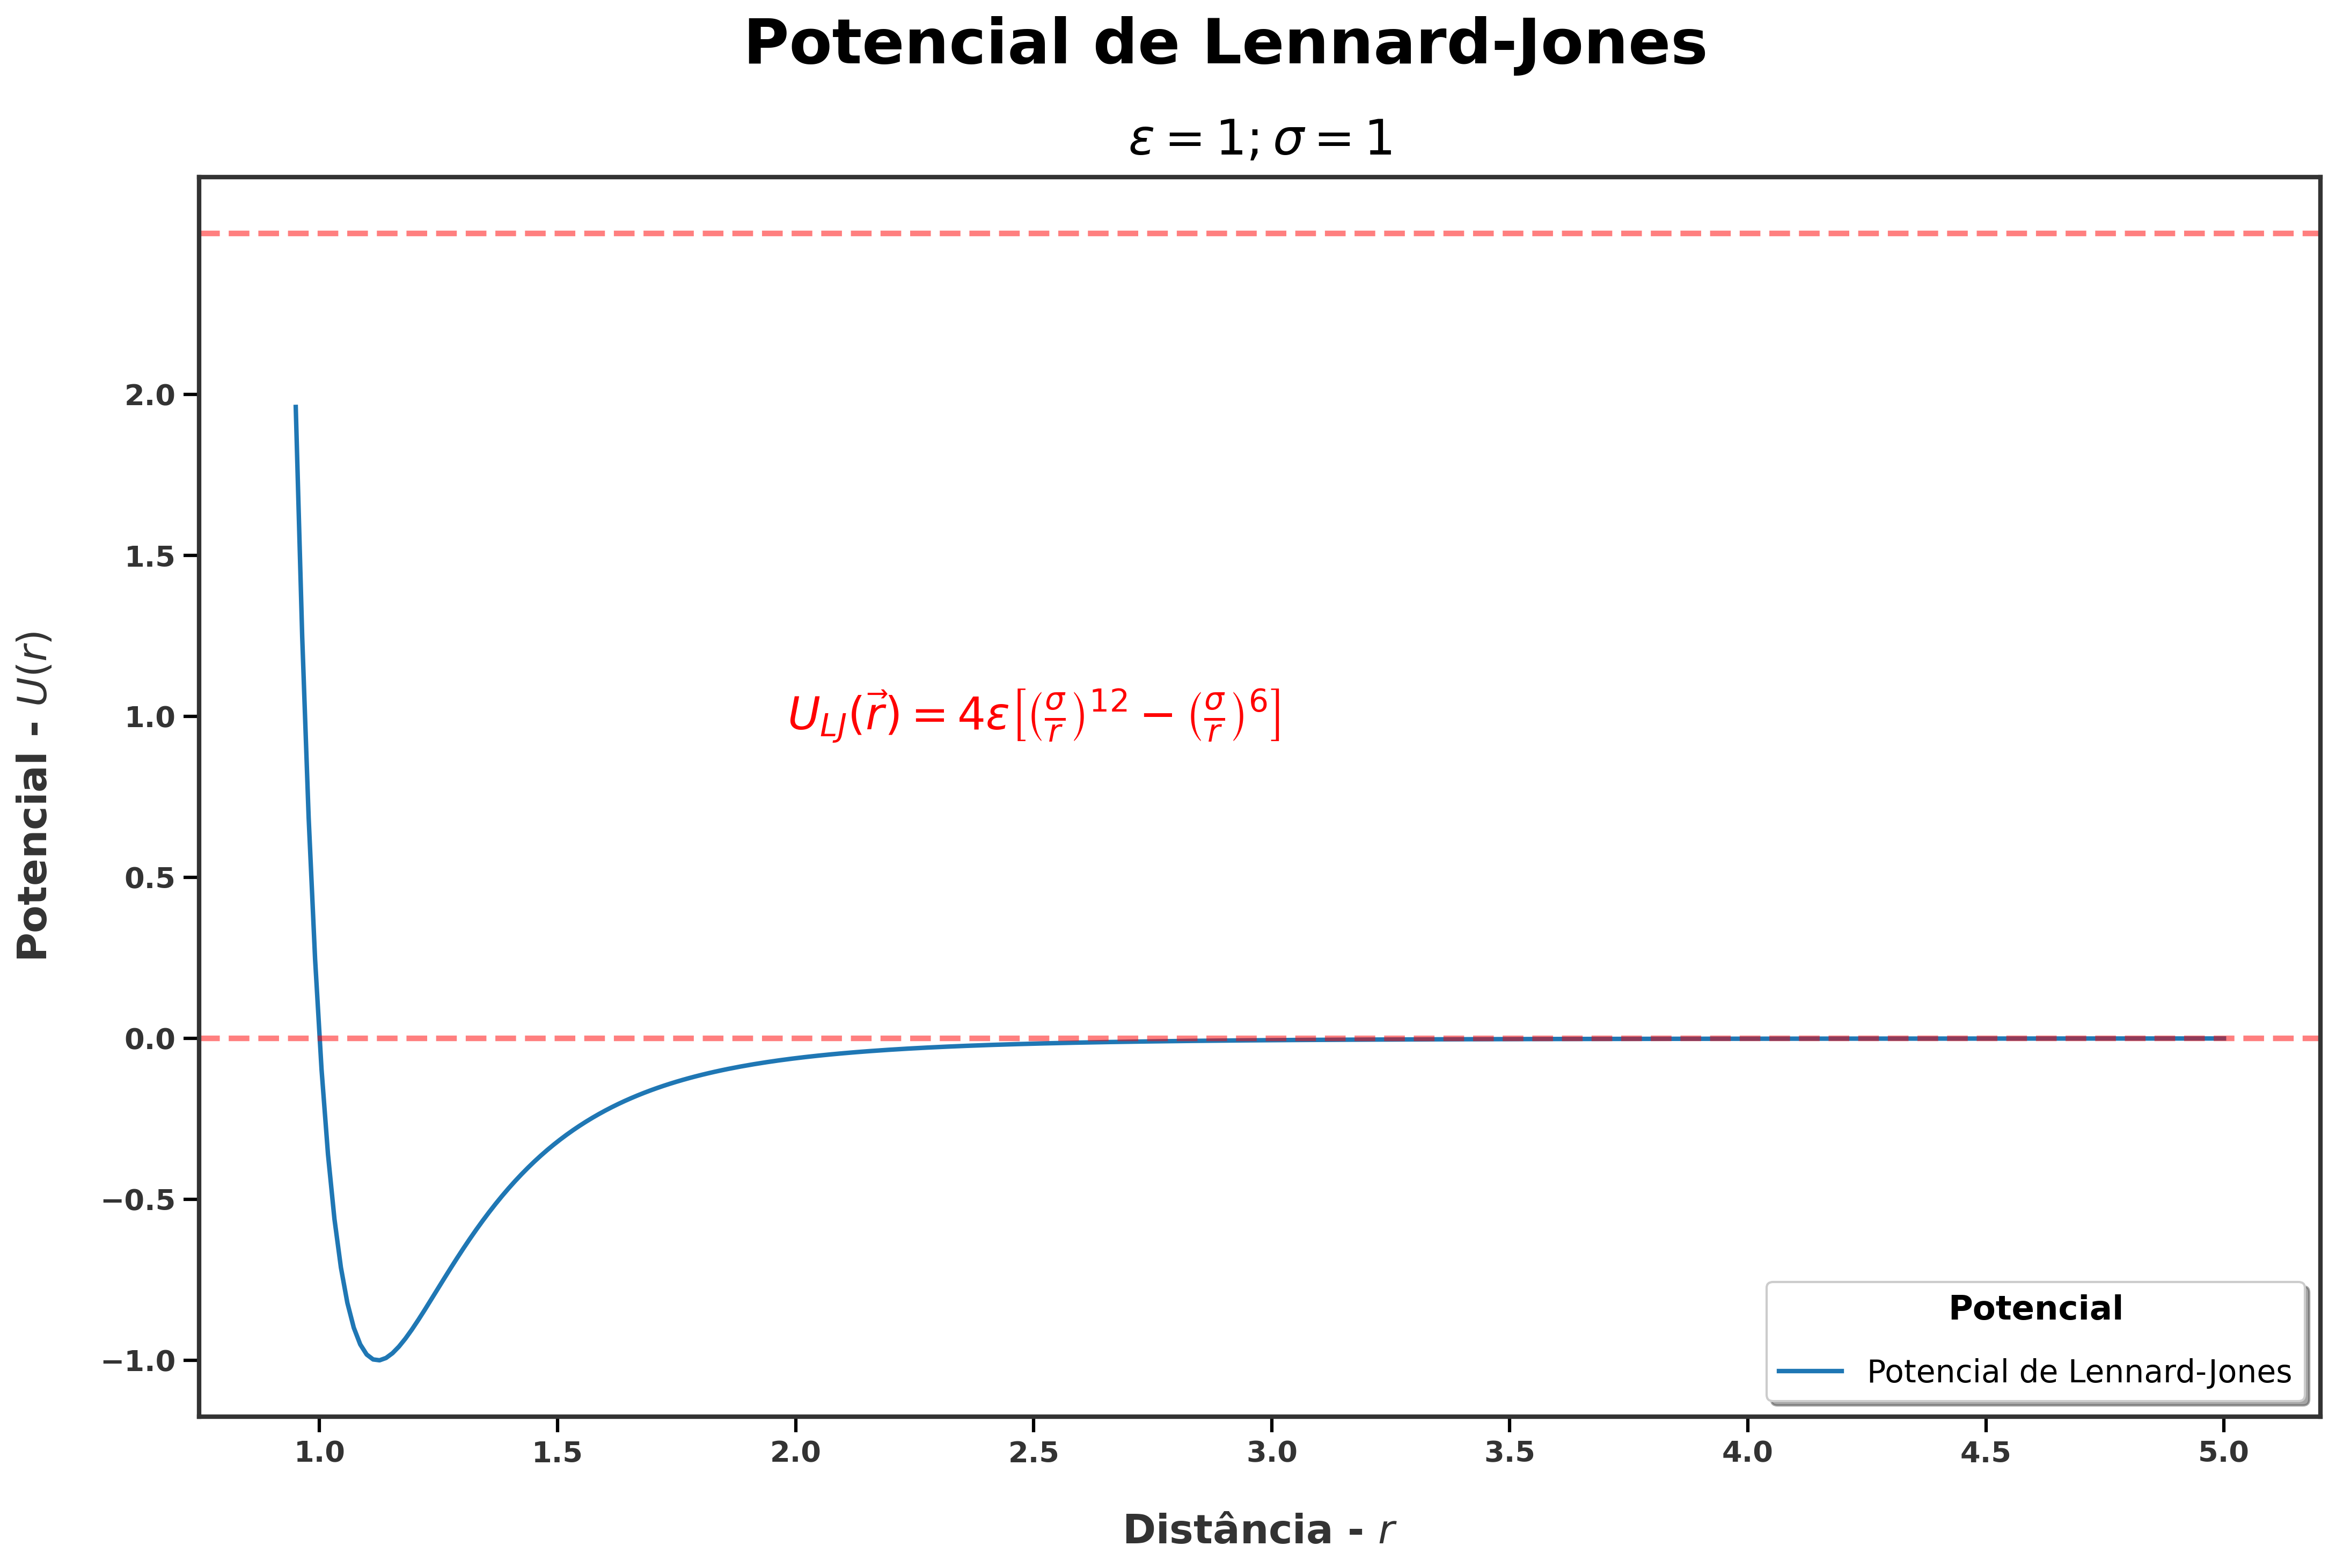

In [10]:
# subplots(linhas, colunas, tamanho figura=largura e altura em polegadas )
fig, ax = plt.subplots(1, 1, figsize=(17, 10))

#
# Título da Figura
#
fig.suptitle("Potencial de Lennard-Jones",
             fontweight = 'bold', 
             fontsize = 28,
             horizontalalignment = "center")

# Título do gráfico
ax.set_title(r'$\epsilon = 1; \sigma = 1$',
             fontweight = 'normal', 
             fontsize = 22,
             loc = "center",
             pad = 10)

sns.lineplot(x = r,
             y = ulj,
             linewidth = 2, 
             label='Potencial de Lennard-Jones')

# Spines -> as linhas dos eixos
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.0)
    ax.spines[axis].set_color('0.2')

# Ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_ticks(np.arange(1.0, 5.1, 0.5))

ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks(np.arange(-1.0, 2.1, 0.5))

# Configurando ticks para os valores
# Tick -> linha nos pontos dos eixos
ax.tick_params(which = 'major',
               length = 7,
               grid_alpha = 0.5,
               width = 1.5)

# definição geral dos ticks do eixo y e x
plt.yticks(size = 13, weight = 'bold', color = '0.2')
plt.xticks(size = 13, weight = 'bold', color = '0.2')

ax.set_ylabel('Potencial - $U(r)$', 
             fontsize = 18, weight = 'bold', 
             color = '0.2', labelpad = 20)
ax.set_xlabel('Distância - $r$', 
              fontsize = 18, weight = 'bold', 
              color = '0.2', labelpad = 20)

sns.move_legend(ax, "best", 
                # bbox_to_anchor=(1, 1),
                fancybox = True,
                shadow = True,
                fontsize = 14,
                title = "Potencial",
                title_fontsize = 15,
                title_fontweight = 'bold',
                labelspacing = 1)

# Linha de marcação para o raio de corte
plt.axhline(rc, color='r', ls="--", alpha=0.5, linewidth=2.5)

# Linha de marcação do valor zero e exibe texto da equação usada
texto = r'$U_{LJ}(\vec r) = 4 \epsilon \left[ \left( \frac{\sigma}{r}\right)^{12} - \left( \frac{\sigma}{r}\right)^{6} \right]$'
plt.axhline(0, color='r', ls="--", alpha=0.5, linewidth=2.5)
ax.text(2.5, 1.0, texto, color='red', horizontalalignment='center', verticalalignment='center', fontsize=20, fontweight='bold')

# Salvando gráfico
plt.savefig('potencial_lennard_jones.PNG', bbox_inches = 'tight', dpi =250, facecolor = ax.get_facecolor())
#plt.cla()

# Fechando
# plt.close(fig)

# Show 
plt.show()

<h1 style="color: #2e6c80;">2. Condições iniciais</h1>
Onde iremos definir:<br/>

* $\vec r(0)$: posição inicial das partículas
* $\vec v(0)$: velocidade inicial das partículas
* $N$: tamanho da grade de simulação
* $raio$: raio da partícula
* etc. 

In [11]:
# Número de partículas
N = 100

# O tamanho deve ser suficiente para conter todas as partículas (N)
grade = int(np.ceil(np.sqrt(N)))
radius = 0.3 # raio da partícula
L = 10 # tamanho da caixa

duration = 10  # duration of simulation
nsteps = 1500 # number of steps
dt = duration/nsteps  # time step
v0 = 1.5 # initial velocity magnitude

espaco = L / grade 
x = np.linspace(raio + espaco/2, L - raio - espaco/2, grade) 
pos = list(product(x, x))
positions = np.array(pos[:N]) 

#initialize the velocities: random directions but fixed magnitude
theta = np.random.uniform(0, 2*np.pi, size=N)
vx, vy = v0*np.cos(theta), v0*np.sin(theta)
velocities = np.stack((vx,vy), axis=1)

(0.0, 10.0)

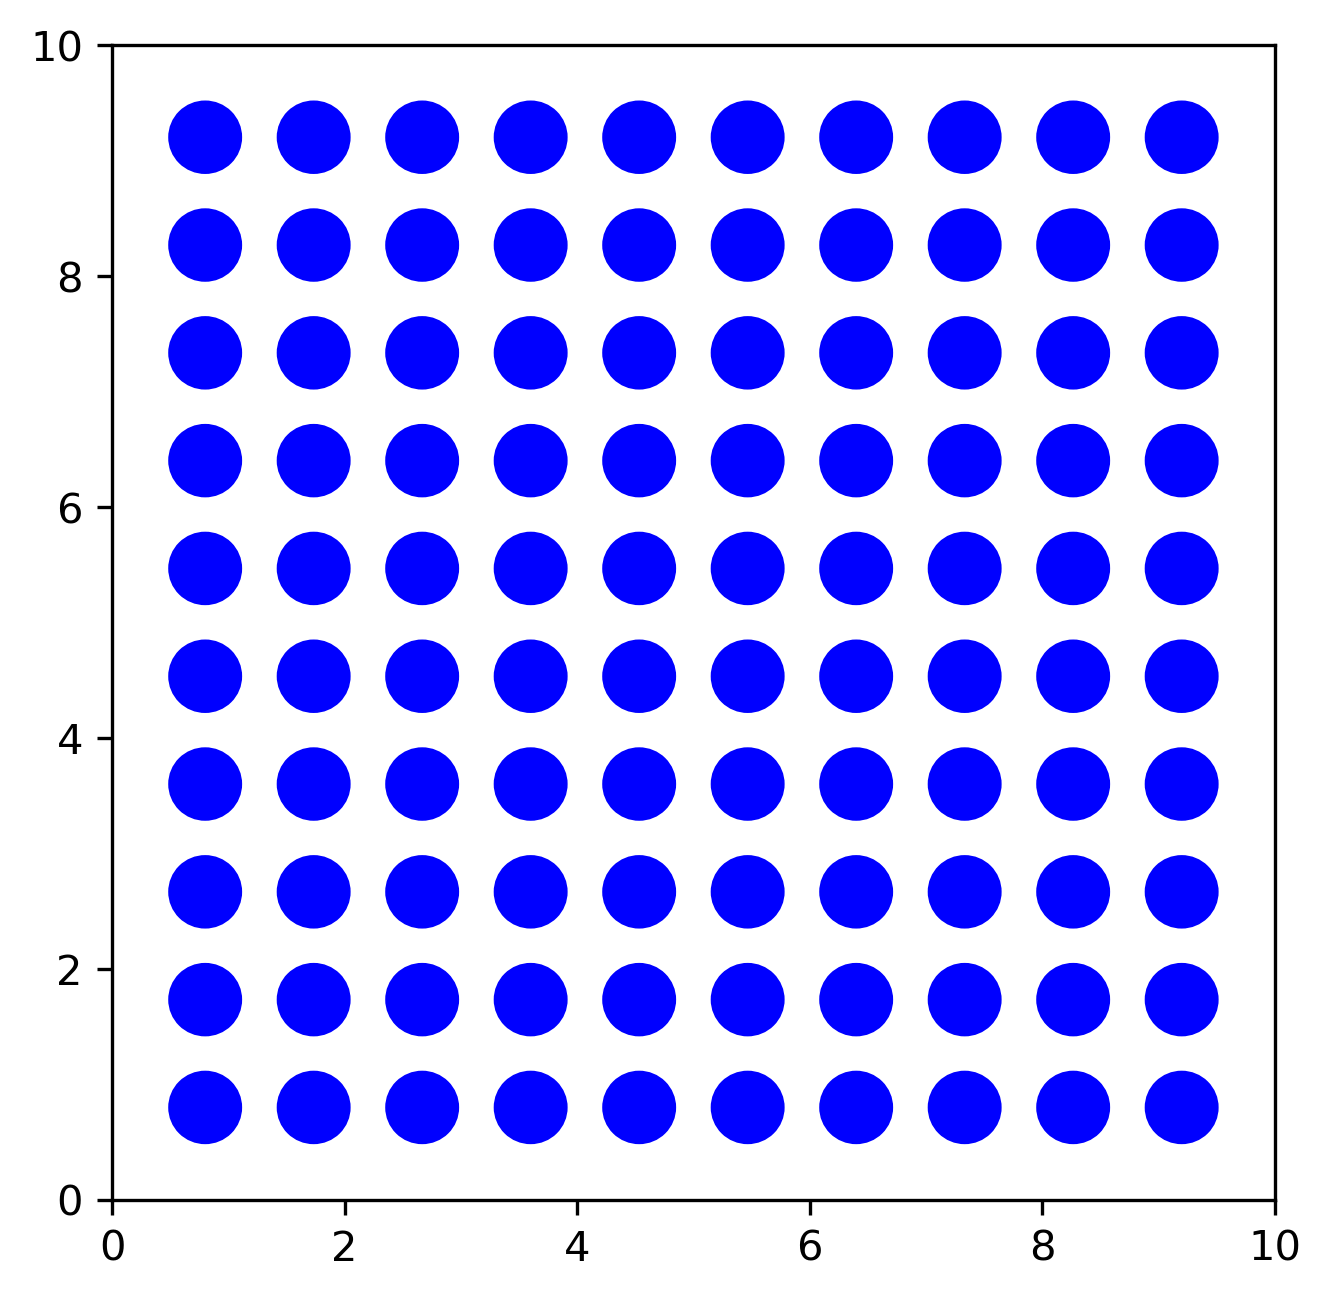

In [12]:
fig,ax = plt.subplots(figsize=(5,5))
for i in range(N):
    circle = plt.Circle((positions[i,0], positions[i,1]), radius, fill=True, color='blue') #plot the particle
    ax.add_artist(circle)

ax.set_xlim(0,L)
ax.set_ylim(0,L)